In [35]:
import numpy as np 
import pandas as pd 
import pickle

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys
sys.path.append('..')

from utils.viz import viz 
from utils.model import *  
from utils.fig_fn import *
from utils.tools import *
viz.get_style()

In [2]:
table1 = get_table1('exp1', ['rmPG', 'caPG', 'ecPG', ''], 'map')


             # ------------------------------- rmPG --------------------------------- #
                 Overall nll: 114.562      aic: 231.124      bic: 234.499
                 Train nll: 66.196         aic: 134.392      bic: 137.179            
                 Test nll: 48.366          aic: 98.732       bic: 101.520 
         

             # ------------------------------- caPG --------------------------------- #
                 Overall nll: 111.160      aic: 226.319      bic: 233.070
                 Train nll: 64.235         aic: 132.470      bic: 138.045            
                 Test nll: 46.925          aic: 97.850       bic: 103.425 
         

             # ------------------------------- ecPG --------------------------------- #
                 Overall nll: 101.202      aic: 208.403      bic: 218.529
                 Train nll: 62.061         aic: 130.121      bic: 138.484            
                 Test nll: 39.141          aic: 84.282       bic: 92.644 
         

In [8]:
table1.to_csv('../figures/exp1/Table1.csv')

In [5]:
models = ['rmPG_fea', 'caPG_fea', 'ecPG_fea', 
          'LC', 'MA', 'ACL', 
          'l1PG_fea', 'l2PG_fea', 'dcPG_fea']
table2 = get_table2('exp2', models, 'map')


             # --------------------- rmPG_fea --------------------- #
                 Tot nll: 196.291      aic: 394.583      bic: 398.469
                 cons nll: 56.465      aic: 114.929      bic: 117.717            
                 cont nll: 64.176      aic: 130.351      bic: 133.139
                 conf nll: 75.651      aic: 153.302      bic: 156.089 
         

             # --------------------- caPG_fea --------------------- #
                 Tot nll: 190.740      aic: 385.480      bic: 393.252
                 cons nll: 55.154      aic: 114.307      bic: 119.882            
                 cont nll: 61.410      aic: 126.821      bic: 132.395
                 conf nll: 74.176      aic: 152.352      bic: 157.927 
         

             # --------------------- ecPG_fea --------------------- #
                 Tot nll: 170.913      aic: 347.826      bic: 359.484
                 cons nll: 47.357      aic: 100.715      bic: 109.077            
                 cont nll: 56

In [7]:
table2.to_csv('../figures/exp2/Table2.csv')

## Extended Data 2

In [36]:
models = ['rmPG', 'caPG', 'ecPG']
for m in models: 
    get_fit_param('exp1', m, method='map')

In [37]:
df = get_fit_param('exp1', 'rmPG', method='map')
df['model'] = 'rmPG'
p_names = df.columns[:-2]

In [51]:
p = 'alpha'
ub = df[p].quantile(.975)
lb = df[p].quantile(.025)
valid_df = df.query(f'{p}>={lb} & {p}<={ub}')
print(valid_df.shape[0])
mu  = valid_df.groupby(by='model')[p].mean().reset_index().loc[0, p]
sd = valid_df.groupby(by='model')[p].std().reset_index().loc[0, p]
s  = f'{mu:.3f}+-{sd:.3f}'
print(s)

155
0.567+-0.630


In [46]:
mu

,model,alpha


In [25]:
df.groupby(by='model')['alpha'].mean().reset_index()
df.groupby(by='model')['alpha'].mean().reset_index()

,model,alpha
0,rmPG,2.434944


(0.0, 5.0)

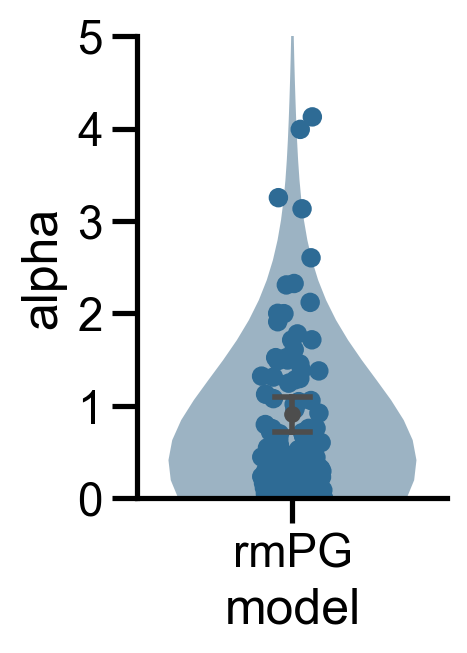

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(2, 3))
viz.violin(ax, y='alpha', x='model', order=['rmPG'],
            data=df, palette=[viz.Blue]) 
ax.set_ylim([0, 5])